1. Run agglomerative cluster analysis using different linkage methods based on quantitative 
environmental variables (see previous exercise), using sites from the Douro and Tejo basins.

In [1]:
import numpy as np # for getting our distribution
import pandas as pd # to handle data frames
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting
from scipy import stats # to compute statistics
from scipy.cluster.hierarchy import dendrogram, linkage # to run the linkage method and create dendrograms
from sklearn.cluster import AgglomerativeClustering # to perform agglomerative clustering

In [2]:
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")
df=df.dropna()
df


,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
18,ES_03_0001,41.957268,-2.926857,Spain,Douro,0,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
19,ES_03_0002,41.850818,-2.591150,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
28,ES_03_0012,41.498026,-5.528753,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
32,ES_03_0016,41.586853,-3.072064,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
43,ES_03_0029,41.830177,-3.782420,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5006,PTVO60,40.641612,-8.325149,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5007,PTVO61,40.729015,-8.098851,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5008,PTVO62,40.727959,-8.107344,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5009,PTVO63,40.817783,-8.224903,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the data
df = pd.read_csv('EFIplus_medit.zip', compression='zip', sep=";")

# Select continuous variables
continuous_vars = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 
                   'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']

# Select data for clustering
X = df[continuous_vars]

# Drop rows with missing values
X.dropna(inplace=True)



/var/folders/nx/dr_pnkkn1yg156jk80s020sc0000gn/T/ipykernel_6044/2376982819.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


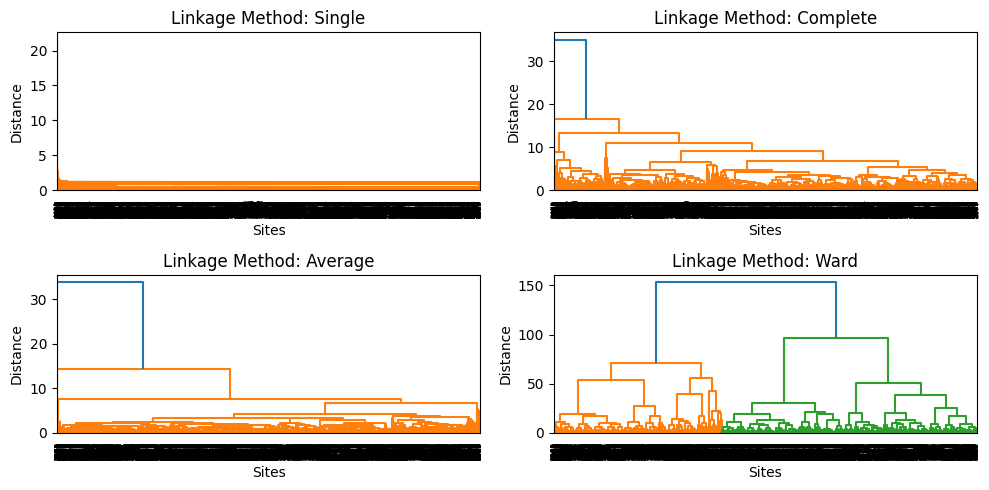

In [4]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check if there are any non-finite values after scaling
if not np.all(np.isfinite(X_scaled)):
    raise ValueError("The standardized data contains non-finite values.")

# Compute the distance matrix using Euclidean distance
distance_matrix = np.linalg.norm(X_scaled[:, None] - X_scaled, axis=-1)

# Agglomerative clustering with different linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']
clusters = {}

for method in linkage_methods:
    # Perform clustering
    Z = linkage(X_scaled, method=method)
    clusters[method] = Z  # Store the clustering result directly

# Visualization and Interpretation
plt.figure(figsize=(10, 5))
for i, method in enumerate(linkage_methods):
    plt.subplot(2, 2, i+1)
    dendrogram(clusters[method], labels=np.arange(1, len(X)+1))
    plt.title(f'Linkage Method: {method.capitalize()}')
    plt.xlabel('Sites')
    plt.ylabel('Distance')
plt.tight_layout()
plt.show()


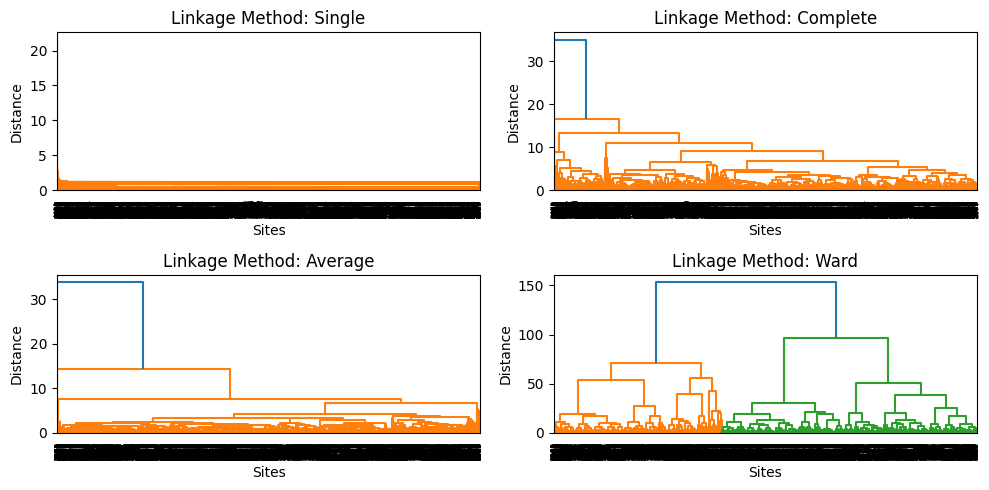

In [5]:
# Compute the distance matrix using Euclidean distance
distance_matrix = np.linalg.norm(X_scaled[:, None] - X_scaled, axis=-1)

# Agglomerative clustering with different linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']
clusters = {}

for method in linkage_methods:
    # Perform clustering
    Z = linkage(X_scaled, method=method)
    clusters[method] = Z  # Store the clustering result directly

# Visualization and Interpretation
plt.figure(figsize=(10, 5))
for i, method in enumerate(linkage_methods):
    plt.subplot(2, 2, i+1)
    dendrogram(clusters[method], labels=np.arange(1, len(X)+1))
    plt.title(f'Linkage Method: {method.capitalize()}')
    plt.xlabel('Sites')
    plt.ylabel('Distance')
plt.tight_layout()
plt.show()

2. Plot a heatmap and a dendrogram by clustering the rows (sites) using average linkage

/var/folders/nx/dr_pnkkn1yg156jk80s020sc0000gn/T/ipykernel_6044/3822866400.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


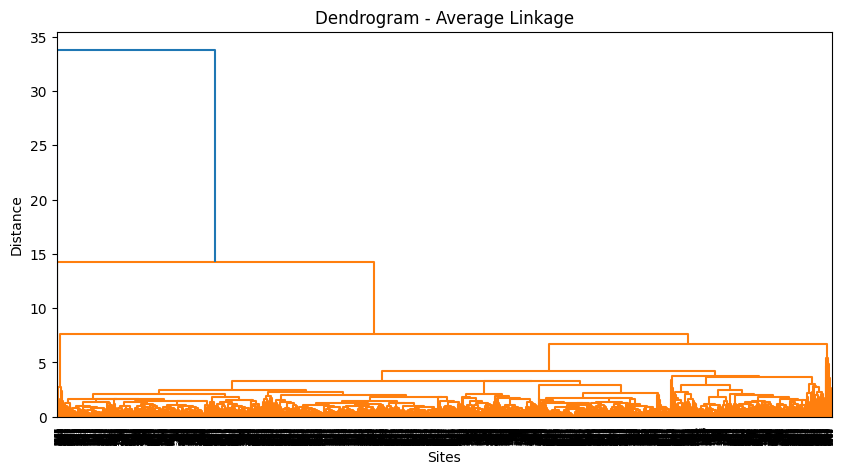

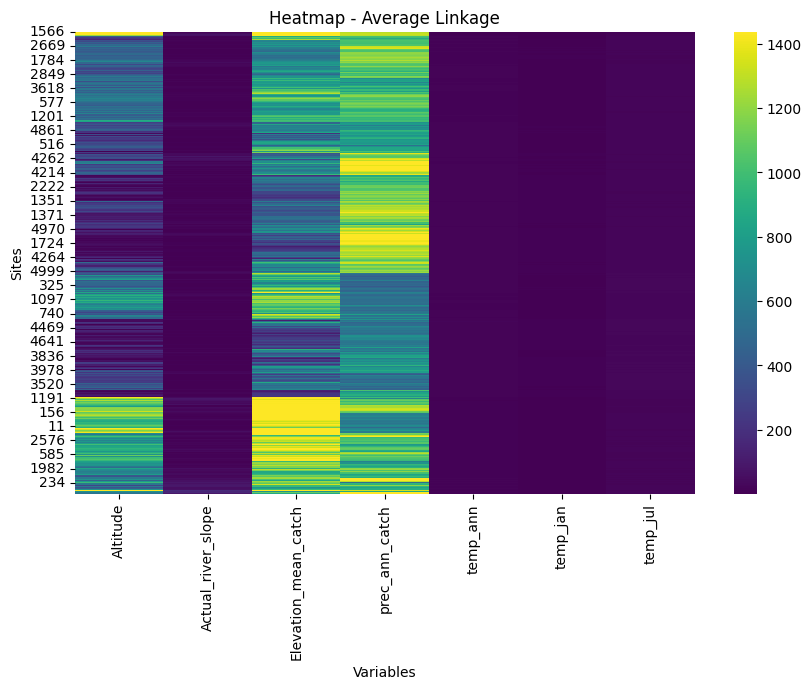

In [6]:
import pandas as pd
import seaborn as sns
from scipy.cluster import hierarchy

# Load the data
df = pd.read_csv('EFIplus_medit.zip', compression='zip', sep=";")

# Select continuous variables
continuous_vars = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 
                   'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']

# Select data for clustering
X = df[continuous_vars]

# Drop rows with missing values
X.dropna(inplace=True)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform hierarchical clustering
Z = hierarchy.linkage(X_scaled, method='average')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram = hierarchy.dendrogram(Z, labels=X.index, orientation='top')
plt.title('Dendrogram - Average Linkage')
plt.xlabel('Sites')
plt.ylabel('Distance')
plt.show()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(X.loc[dendrogram['ivl']], cmap='viridis', robust=True)
plt.title('Heatmap - Average Linkage')
plt.xlabel('Variables')
plt.ylabel('Sites')
plt.show()


3. Plot a dendrogram that clusters the environmental variables instead (columns) using average inkage - discuss how this would help to select variables for e.g a regression-based analysis (NOTE: to transpose a dataframe use "name of the datarame".T)

- the denogram is showing us similarities among the environmental variables. Would be useful in helping in creating simpler, more interpretable and better performing regression models

/var/folders/nx/dr_pnkkn1yg156jk80s020sc0000gn/T/ipykernel_6044/250665187.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


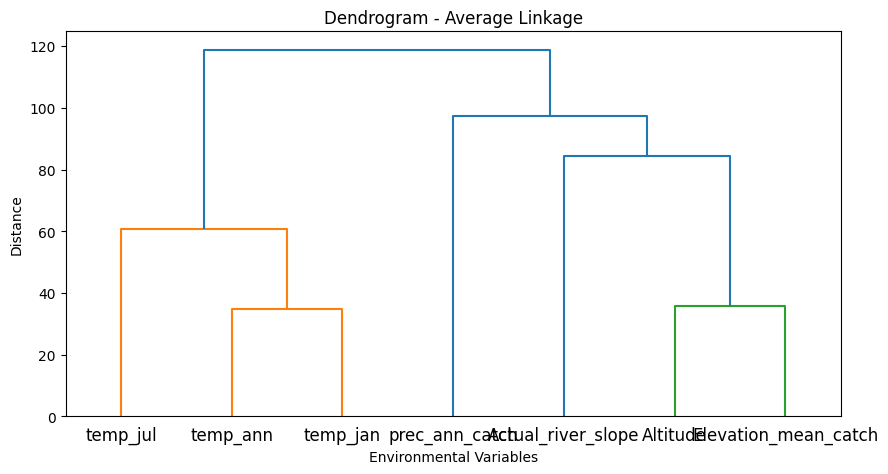

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from sklearn.preprocessing import StandardScaler

# Load the data
df = pd.read_csv('EFIplus_medit.zip', compression='zip', sep=";")

# Select continuous variables
continuous_vars = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 
                   'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']

# Select data for clustering
X = df[continuous_vars]

# Drop rows with missing values
X.dropna(inplace=True)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform hierarchical clustering
Z = hierarchy.linkage(X_scaled.T, method='average')  # Transpose X for clustering by variables

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram = hierarchy.dendrogram(Z, labels=continuous_vars, orientation='top')
plt.title('Dendrogram - Average Linkage')
plt.xlabel('Environmental Variables')
plt.ylabel('Distance')
plt.show()


